<a href="https://colab.research.google.com/github/kobrue02/evaluating-llm-generated-nlu-data/blob/main/bin/notebooks/evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/kobrue02/evaluating-llm-generated-nlu-data/
%cd evaluating-llm-generated-nlu-data

Cloning into 'evaluating-llm-generated-nlu-data'...
remote: Enumerating objects: 1054, done.
remote: Counting objects: 100% (170/170), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 1054 (delta 94), reused 101 (delta 43), pack-reused 884 (from 1)
Receiving objects: 100% (1054/1054), 10.79 MiB | 21.83 MiB/s, done.
Resolving deltas: 100% (692/692), done.
/content/evaluating-llm-generated-nlu-data


In [2]:
import json
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [5]:
from bin.utils.methods import *
from bin.framework.framework import Framework

In [4]:
import logging
logging.basicConfig(level=logging.INFO)

In [5]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [6]:
dataset_names = [
    "attribute_controlled_prompt_data",
    "persona_based_prompt_s1_data",
    "chain_of_thought_simple_data",
    "zero_shot_simple_data",
    "one_shot_simple_data",
    "few_shot_simple_data",
]

In [8]:
ref_df = load_sipgate_dataset()

load phi data

In [9]:
phi_dfs = [load_df(f"phi/{dataset_name}") for dataset_name in dataset_names]

In [10]:
llama_dfs = [load_df(f"llama/llama_{dataset_name}") for dataset_name in dataset_names]

In [11]:
framework = Framework()
evaluated_sets_phi = []
for gen_df in phi_dfs:
  gen_df = clean_synthetic_dataset(gen_df)
  results = framework.apply_framework_to_datasets(gen_df, ref_df)
  df = results_to_dataframe(results)
  evaluated_sets_phi.append(df)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/255k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/485k [00:00<?, ?B/s]

 88%|████████▊ | 80/91 [00:24<00:05,  2.06it/s]/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 10%|▉         | 9/92 [00:02<00:20,  4.03it/s]/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 18%|█▊        | 17/92 [00:06<00:33,  2.25it/s]/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_

In [ ]:
dfs_to_stripplots(evaluated_sets_phi)

In [12]:
framework = Framework()
evaluated_sets_llama = []
for gen_df in llama_dfs:
  gen_df = clean_synthetic_dataset(gen_df)
  results = framework.apply_framework_to_datasets(gen_df, ref_df)
  df = results_to_dataframe(results)
  evaluated_sets_llama.append(df)

 43%|████▎     | 40/92 [00:20<00:08,  6.15it/s]/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 92/92 [00:22<00:00,  4.03it/s]


In [ ]:
dfs_to_stripplots(evaluated_sets_llama)

In [13]:
def merge_dataframes(evaluated_sets, dataset_names):
    """Merges a list of dataframes into a single dataframe with a new column indicating the prompting strategy.

    Args:
        evaluated_sets: A list of pandas DataFrames.
        dataset_names: A list of strings representing the prompting strategy names.

    Returns:
        A single pandas DataFrame with all data merged and a new "Prompting Strategy" column.
        Returns None if input lists are not of equal length or if any error occurs during processing.
    """
    if len(evaluated_sets) != len(dataset_names):
        print("Error: evaluated_sets and dataset_names must have the same length.")
        return None

    try:
        merged_df = pd.DataFrame()
        for i, df in enumerate(evaluated_sets):
            df['Prompting Strategy'] = dataset_names[i]
            merged_df = pd.concat([merged_df, df], ignore_index=True)
        return merged_df
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [14]:
merged_phi_df = merge_dataframes(evaluated_sets_phi, dataset_names)
merged_llama_df = merge_dataframes(evaluated_sets_llama, dataset_names)

In [15]:
concatenated_df = pd.concat([merged_phi_df, merged_llama_df], ignore_index=True)
concatenated_df["Model"] = ""  # Add a new column named "Model" initialized with empty strings
concatenated_df.loc[concatenated_df.index < len(merged_phi_df), "Model"] = "Phi"
concatenated_df.loc[concatenated_df.index >= len(merged_phi_df), "Model"] = "Llama"

In [16]:
ref_eval = framework.apply_framework_to_datasets(ref_df)

100%|██████████| 92/92 [00:05<00:00, 17.51it/s]


In [17]:
ref_eval_df = results_to_dataframe(ref_eval)
ref_eval_df["Prompting Strategy"] = "Sipgate"
ref_eval_df["Model"] = "Human"
concatenated_df = pd.concat([concatenated_df, ref_eval_df], ignore_index=True)

In [19]:
concatenated_df
concatenated_df.to_csv("results.csv", index=False)

In [14]:
concatenated_df = pd.read_csv("results.csv")
concatenated_df

,distinct_1,distinct_2,ttr,moving_average_ttr,average_n_of_tokens,average_n_of_characters,distance_to_centroid,discourse_coherence,inter_sentence_similarity,pos_tag_n_grams_diversity,bleu,mean_levenshtein_distance,intent,Prompting Strategy,Model
0,0.304,0.527,0.286,0.635,4.308,30.538,0.597,1.245,0.604,0.942,0.138,23.778,account_activate_item,attribute_controlled_prompt_data,Phi
1,0.401,0.745,0.386,0.902,7.880,48.720,0.630,0.857,0.568,0.734,1.000,39.360,account_activate_item_not_possible,attribute_controlled_prompt_data,Phi
2,0.201,0.388,0.201,0.898,7.160,42.520,0.633,1.197,0.554,0.846,0.272,30.054,account_ask_item_available,attribute_controlled_prompt_data,Phi
3,0.314,0.624,0.256,0.751,3.440,23.520,0.631,1.054,0.574,0.399,0.578,17.686,account_delete_item,attribute_controlled_prompt_data,Phi
4,0.333,0.500,0.281,0.764,5.182,29.364,0.613,1.560,0.563,0.894,0.682,21.473,account_get_item,attribute_controlled_prompt_data,Phi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,0.459,0.891,0.414,0.912,4.440,27.880,0.819,0.744,0.295,0.537,NaN,NaN,request_migrate_product,Sipgate,Human
1187,0.568,0.876,0.527,0.924,5.840,44.040,0.784,0.681,0.354,0.514,NaN,NaN,routing_set_time_profile,Sipgate,Human
1188,0.485,0.780,0.465,0.824,4.040,25.360,0.707,0.782,0.463,0.450,NaN,NaN,service_disruption_inquire,Sipgate,Human
1189,0.400,0.743,0.387,0.785,3.000,17.200,0.741,0.946,0.413,0.387,NaN,NaN,softphone_request_info,Sipgate,Human


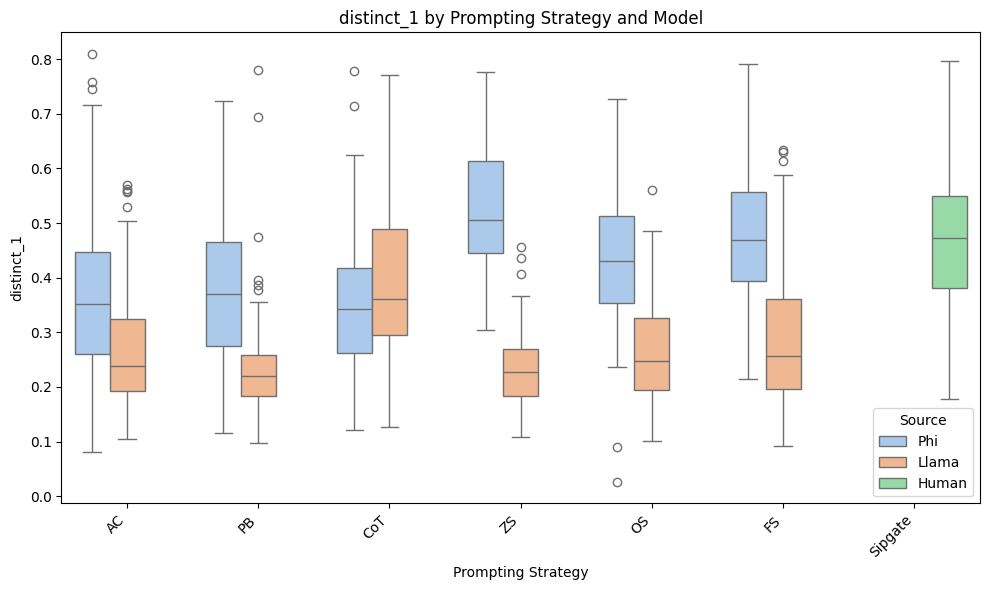

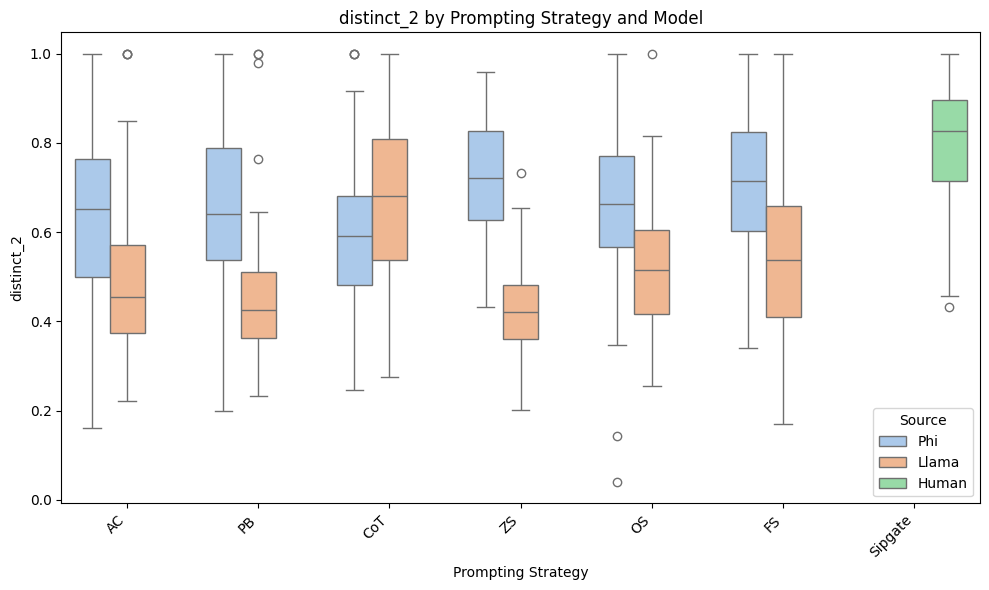

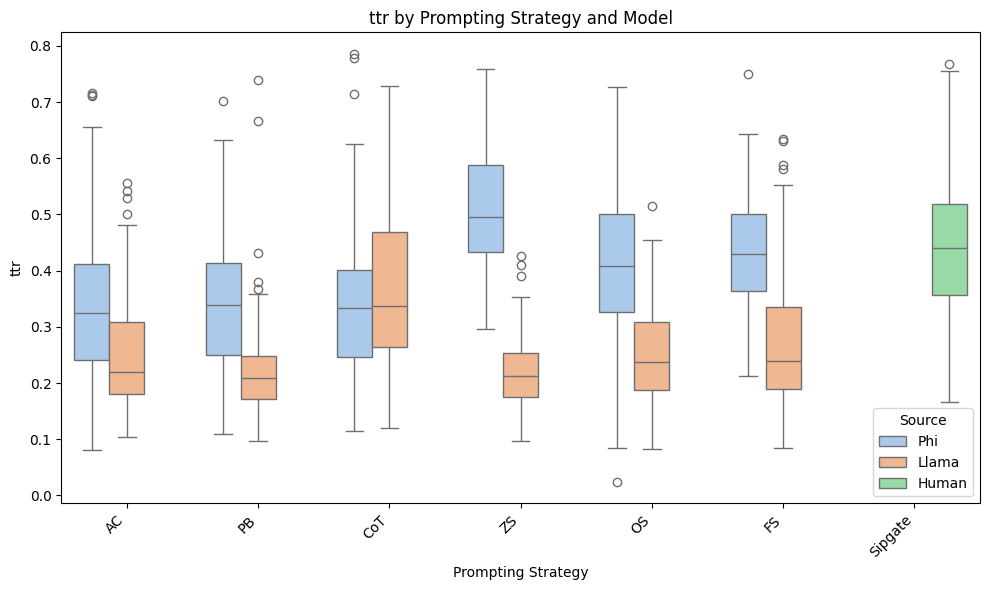

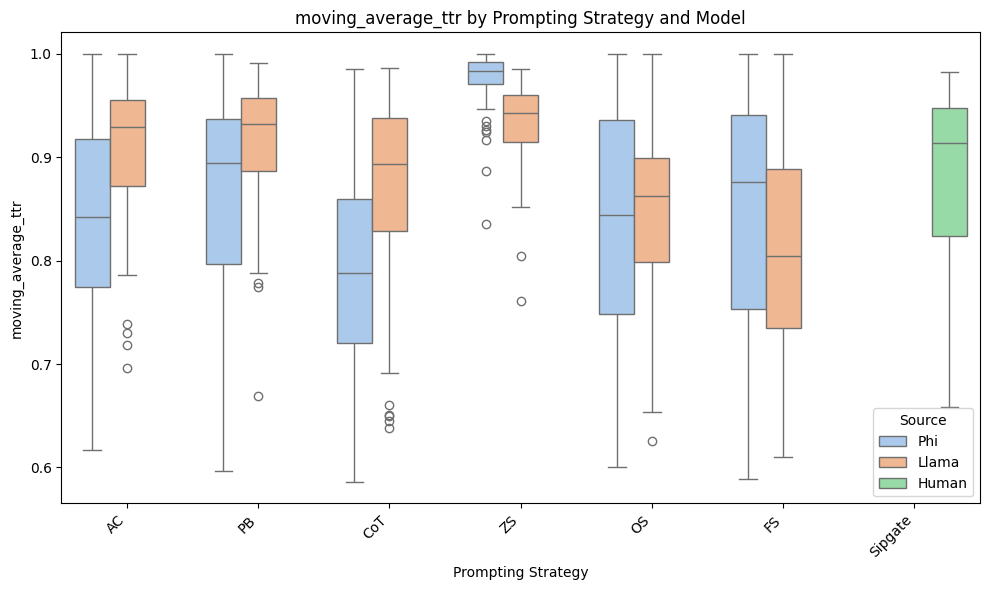

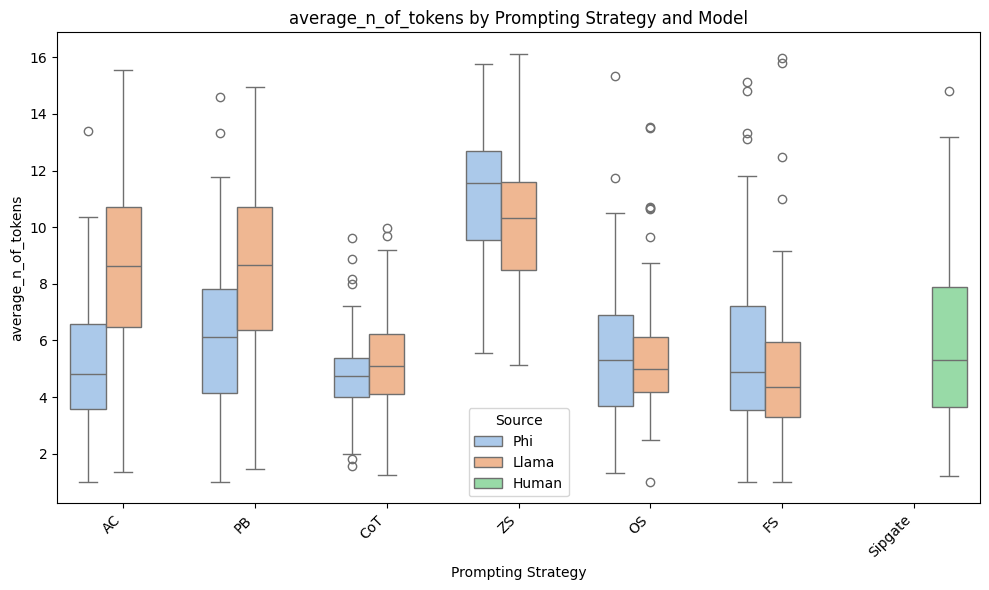

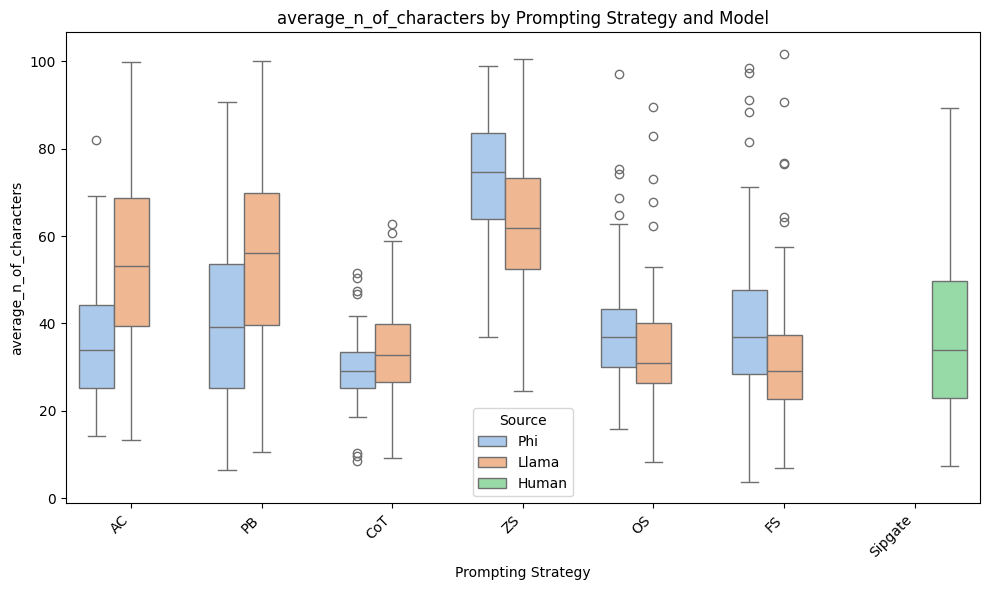

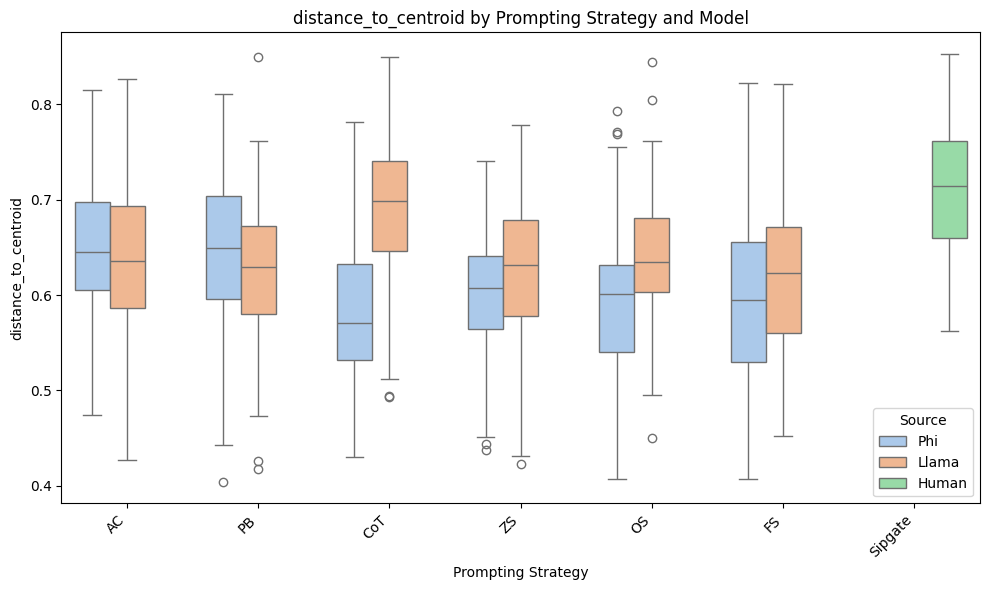

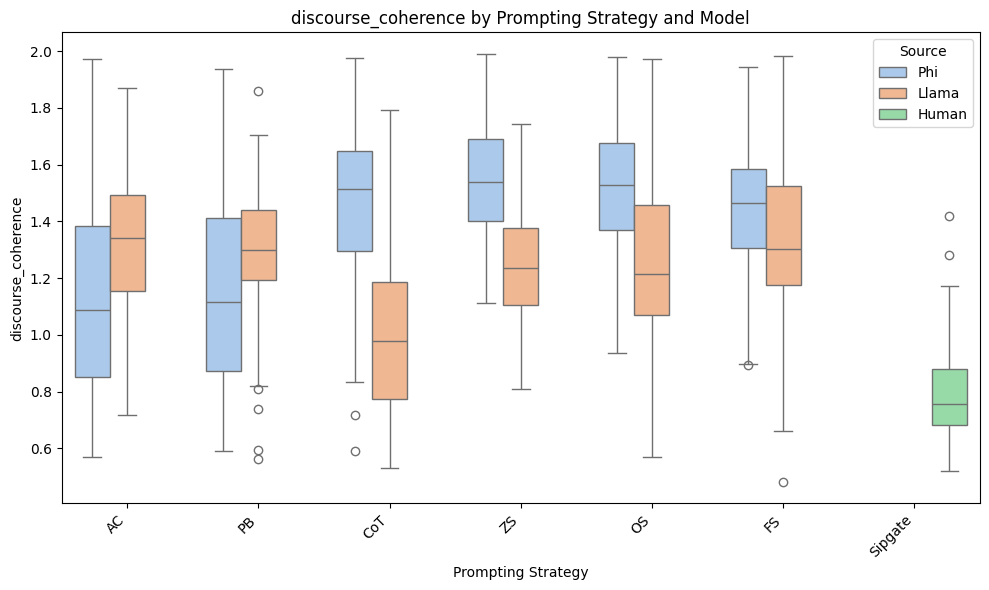

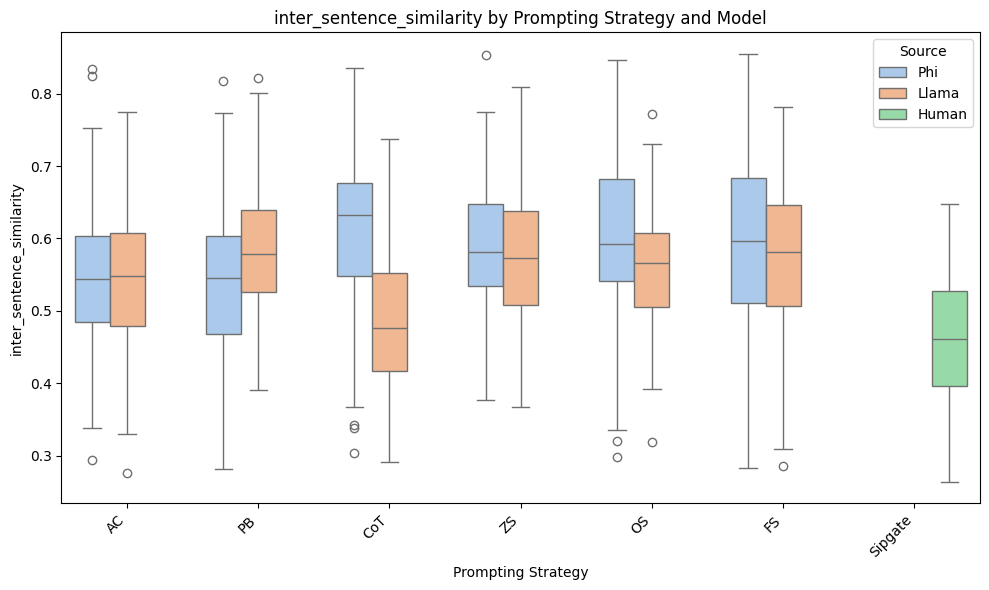

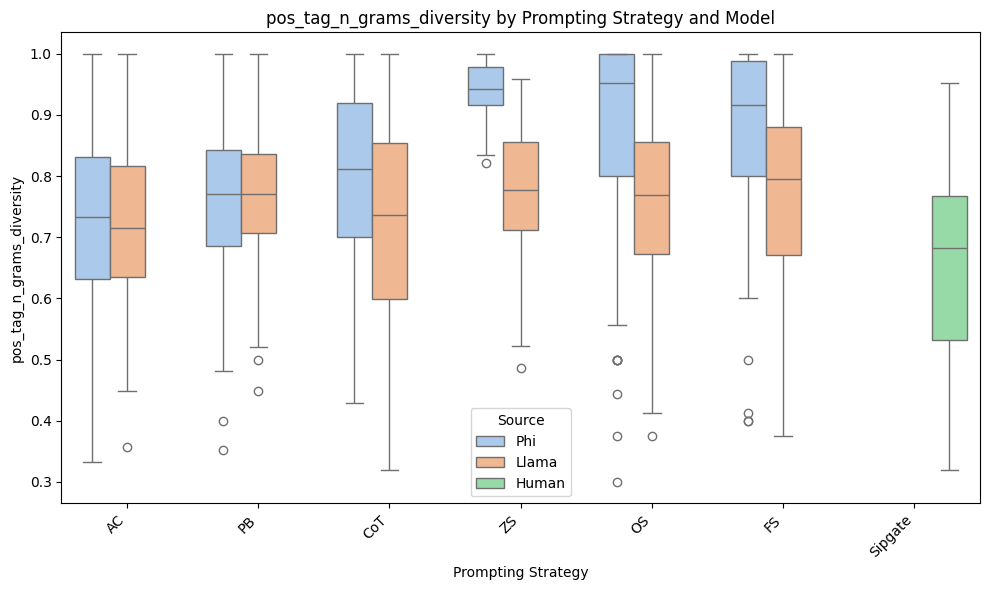

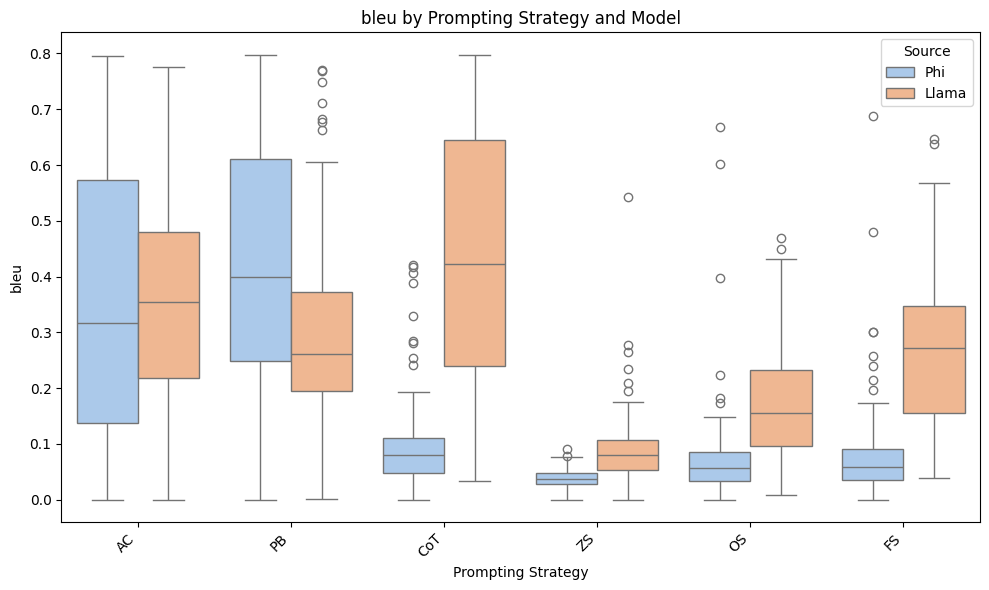

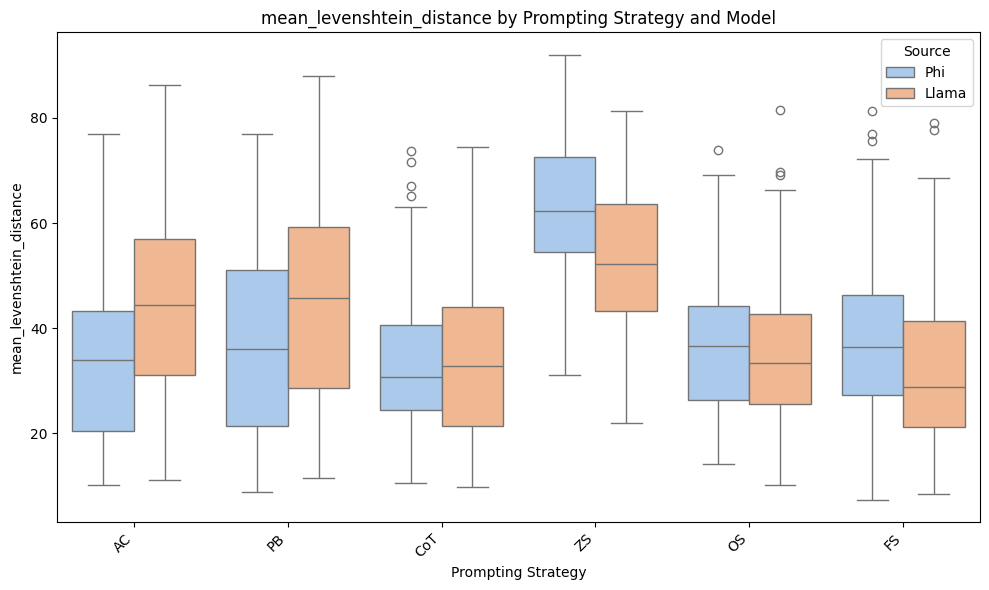

In [30]:
metrics = [col for col in concatenated_df.columns if col not in ["Prompting Strategy", "Model"]]

x_tick_dict = {
    "zero_shot_simple_data": "ZS",
    "one_shot_simple_data": "OS",
    "few_shot_simple_data": "FS",
    "chain_of_thought_simple_data": "CoT",
    "persona_based_prompt_s1_data": "PB",
    "attribute_controlled_prompt_data": "AC",
}

for metric in metrics:
    if metric in ["intent", "Dataset"]:
        continue

    plt.figure(figsize=(10, 6))

    # Remove extreme outliers
    q1 = concatenated_df[metric].quantile(0.25)
    q3 = concatenated_df[metric].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    temp_data = concatenated_df[(concatenated_df[metric] >= lower_bound) & (concatenated_df[metric] <= upper_bound)]

    # Create the boxplot
    ax = sns.boxplot(
        x="Prompting Strategy",
        y=metric,
        hue="Model",
        data=temp_data,
        palette="pastel"
    )

    # Rename each x-tick to its abbreviation
    current_labels = [t.get_text() for t in ax.get_xticklabels()]
    new_labels = [x_tick_dict.get(label, label) for label in current_labels]  # Default to original if not found
    plt.xticks(ticks=range(len(current_labels)), labels=new_labels, rotation=45, ha='right')

    # Rename the legend to "Source"
    plt.legend(title="Source")
    plt.title(f"{metric} by Prompting Strategy and Model")

    plt.tight_layout()
    plt.savefig(f"{metric}.png")
    plt.show()

In [6]:
import numpy as np
from scipy.spatial.distance import jensenshannon

def compute_jsd(p_values, q_values, num_bins=50):
    """Compute Jensen-Shannon Divergence between two distributions."""
    # Estimate probability distributions using histograms
    p_hist, bin_edges = np.histogram(p_values, bins=num_bins, density=True)
    q_hist, _ = np.histogram(q_values, bins=bin_edges, density=True)

    # Normalize histograms to create probability distributions
    p_prob = p_hist / np.sum(p_hist)
    q_prob = q_hist / np.sum(q_hist)

    # Compute JSD
    return jensenshannon(p_prob, q_prob, base=2)  # base=2 for easier interpretation

In [28]:
# prompt: compute the JSD for each metric for each Prompting Strategy and each Model in the dataset when compared to the human data

# Assuming 'concatenated_df' and 'metrics' are defined as in the provided code.

jsd_results = {}
framework = Framework()

for metric in framework.hypotheses_metrics:
    metric = metric.name.lower()
    jsd_results[metric] = {}

    for prompting_strategy in concatenated_df["Prompting Strategy"].unique():
        jsd_results[metric][prompting_strategy] = {}

        for model in ["Llama", "Phi"]:

            # Filter data for current metric, prompting strategy, and model
            current_data = concatenated_df[
                (concatenated_df["Prompting Strategy"] == prompting_strategy) &
                (concatenated_df["Model"] == model)
            ]

            # Filter human data for current metric and prompting strategy ("Sipgate")
            human_data = concatenated_df[
                (concatenated_df["Model"] == "Human")
            ]

            if not current_data.empty and not human_data.empty:
                # Compute JSD
                current_values = current_data[metric].dropna()
                human_values = human_data[metric].dropna()
                jsd = compute_jsd(
                    current_values.tolist(),
                    human_values.tolist()
                    )
                jsd_results[metric][prompting_strategy][model] = jsd
            else:
                jsd_results[metric][prompting_strategy][model] = np.nan # or some other indicator of missing data


jsd_df = pd.DataFrame.from_dict({(i,j): jsd_results[i][j]
                           for i in jsd_results.keys()
                           for j in jsd_results[i].keys()},
                       orient='index')
jsd_df.to_csv("jsd_results.csv")
jsd_df

Llama       Phi
distinct_1                attribute_controlled_prompt_data  0.721825  0.541582
                          persona_based_prompt_s1_data      0.794846  0.487682
                          chain_of_thought_simple_data      0.513080  0.562539
                          zero_shot_simple_data             0.780573  0.452945
                          one_shot_simple_data              0.720466  0.334056
...                                                              ...       ...
pos_tag_n_grams_diversity chain_of_thought_simple_data      0.500884  0.555749
                          zero_shot_simple_data             0.593122  0.915356
                          one_shot_simple_data              0.502570  0.746780
                          few_shot_simple_data              0.458693  0.767873
                          Sipgate                                NaN       NaN

[70 rows x 2 columns]

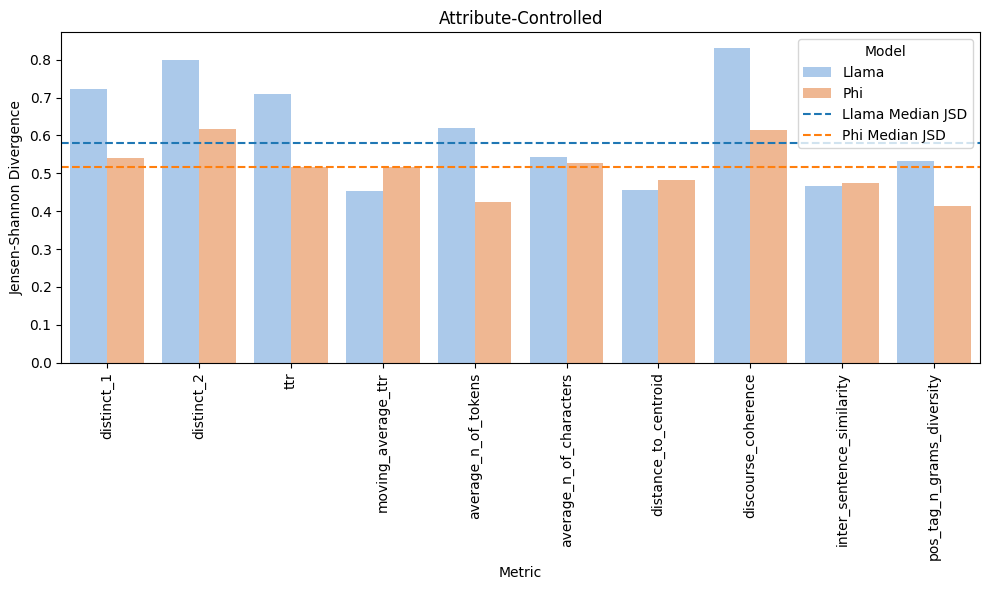

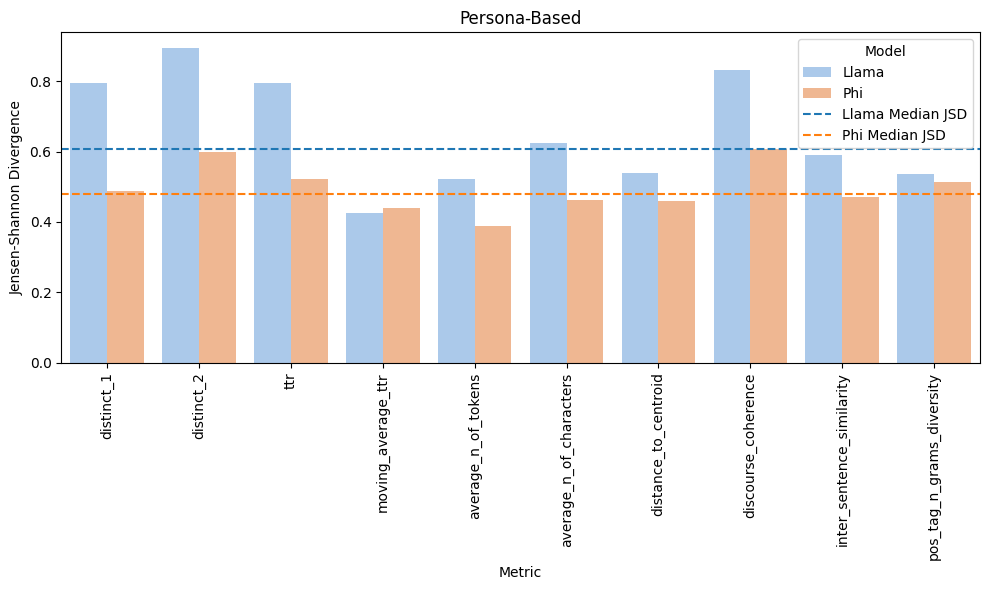

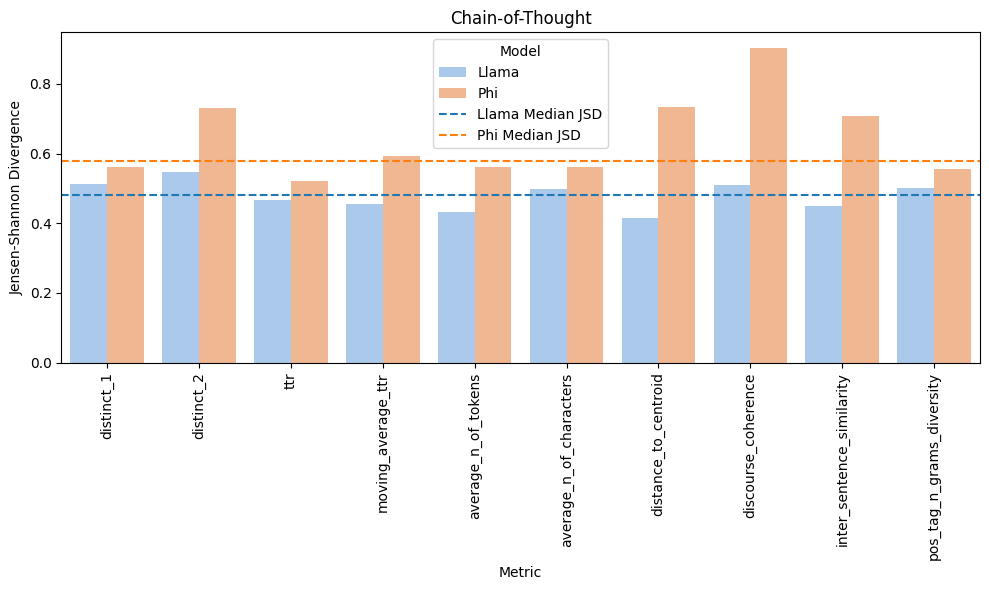

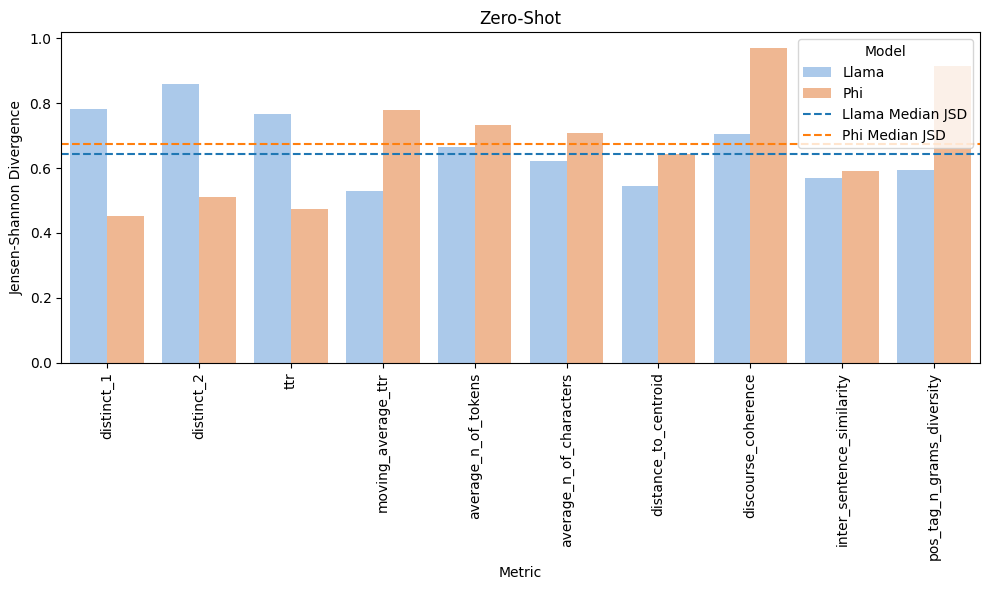

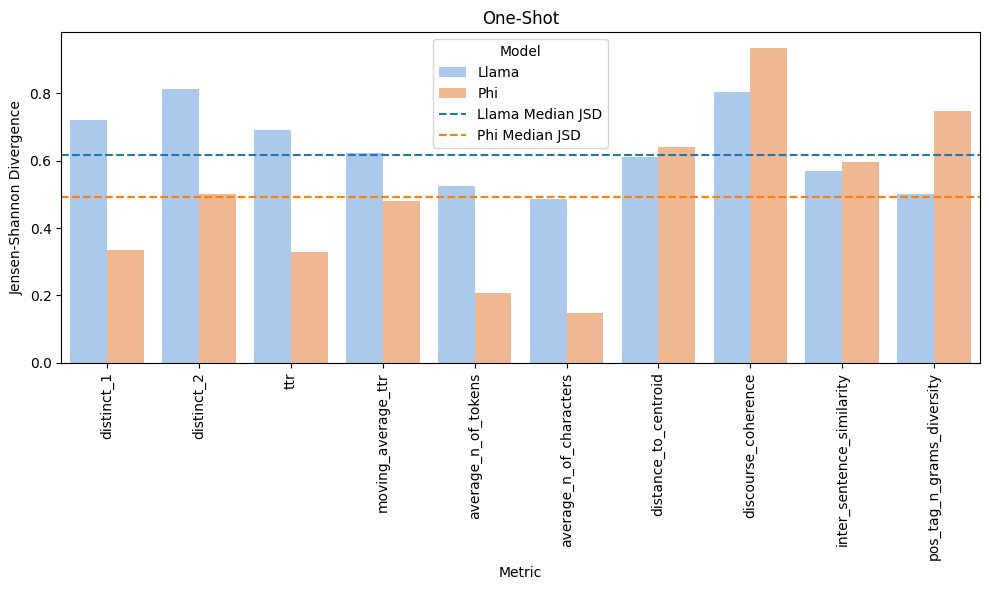

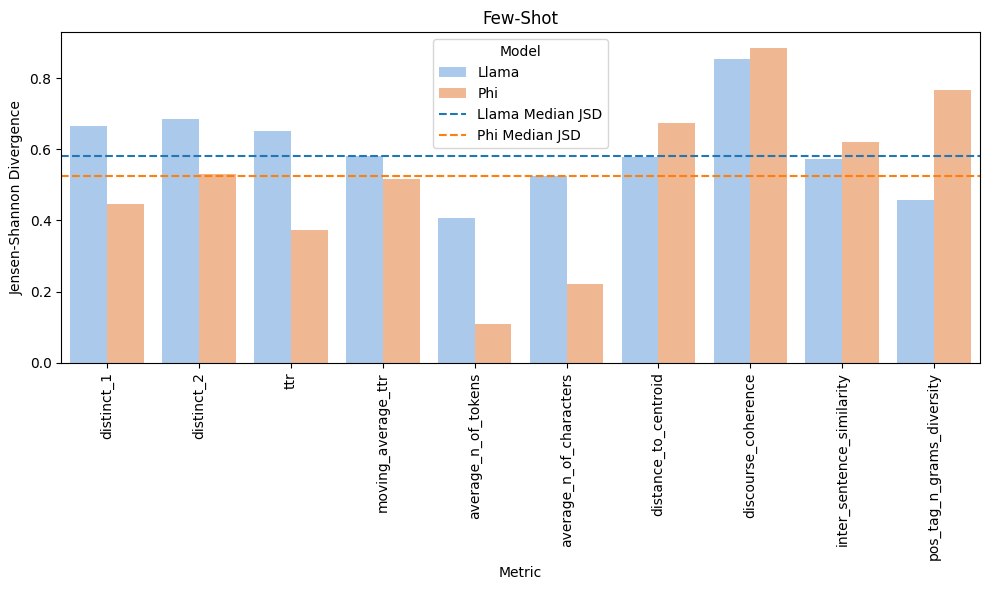

In [52]:
jsd_long = pd.melt(
    jsd_df.reset_index(),
    id_vars=['level_0', 'level_1'],
    value_vars=['Llama', 'Phi'],
    var_name='Model',
    value_name='JSD')

# Rename columns for better clarity
jsd_long = jsd_long.rename(
    columns={
        'level_0': 'Metric',
        'level_1': 'Prompting Strategy'
        }
    )

title_dict = {
    "zero_shot_simple_data": "Zero-Shot",
    "one_shot_simple_data": "One-Shot",
    "few_shot_simple_data": "Few-Shot",
    "chain_of_thought_simple_data": "Chain-of-Thought",
    "persona_based_prompt_s1_data": "Persona-Based",
    "attribute_controlled_prompt_data": "Attribute-Controlled",
}

jsd_long["Metric"] = jsd_long["Metric"].apply(lambda x: title_dict.get(x, x))

for prompting_strategy in jsd_long["Prompting Strategy"].unique():
    if prompting_strategy == "Sipgate":
        continue
    plt.figure(figsize=(10, 6))
    current_data = jsd_long[jsd_long["Prompting Strategy"] == prompting_strategy]
    sns.barplot(
        data=current_data.dropna(),
        x="Metric",
        y="JSD",
        hue="Model",
        palette="pastel")
    # add a horizontal line with each model's median in its respective color
    for i, model in enumerate(["Llama", "Phi"]):
        median_value = current_data[current_data["Model"] == model]["JSD"].median()
        # add a small label that says "Median"
        plt.axhline(
            y=median_value,
            color=sns.color_palette()[i],
            linestyle='--',
            label=f"{model} Median JSD"
            )

    plt.title(title_dict.get(prompting_strategy, prompting_strategy))
    plt.xlabel("Metric")
    plt.ylabel("Jensen-Shannon Divergence")
    plt.legend(title="Model")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f"output/jsd_{prompting_strategy}.png")
    plt.show()